# ADSP Final Project Stock Price Prediction 

In [1]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import norm
import plotly.express as px
import pandas as pd
import numpy as np
import scipy as sp
import quandl
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.stattools as ts
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import coint
from dataclasses import dataclass
from enum import Enum
from statsmodels.regression.rolling import RollingOLS
import Data as data

## 0. Data Fetching 

In [2]:
MSFT = data.get_ETF_data('MSFT', '2000-01-01', '2024-01-01')
#MSFT.to_csv('msft.csv', index=True)

In [3]:
train_msft, val_msft, test_msft = data.split_time_series(MSFT, 0.6,0.2)
#train_msft.to_csv('train_msft.csv', index=True)
#val_msft.to_csv('val_msft.csv', index=True)
#test_msft.to_csv('test_msft.csv', index=True)

In [4]:
display(MSFT.head(5))

,adj_close
date,
2000-01-03,36.263777
2000-01-04,35.037977
2000-01-05,35.408206
2000-01-06,34.222851
2000-01-07,34.670859


## 1. EDA 

In [5]:
data.check_data_summary(MSFT)

Number of rows: 6037
Number of columns: 1
Column names:
Index(['adj_close'], dtype='object')
Data types:
adj_close    float64
dtype: object
Summary statistics:
         adj_close
count  6037.000000
mean     72.005855
std      90.181050
min      11.323847
25%      19.070101
50%      23.766328
75%      80.339023
max     382.000349
Missing values:
adj_close    0
dtype: int64
No duplicated index values.


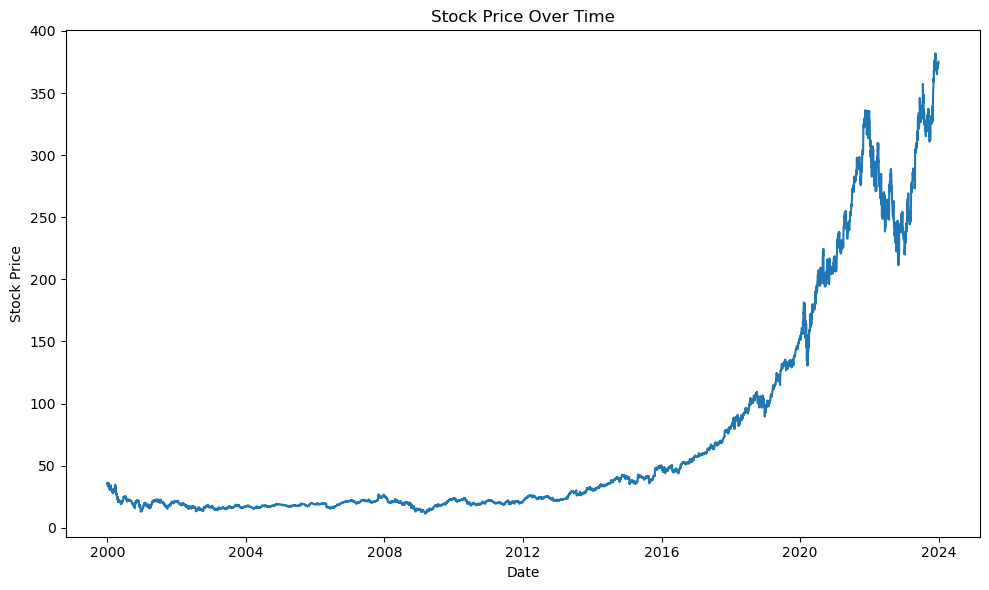

In [6]:
data.plot_stock_price(MSFT)

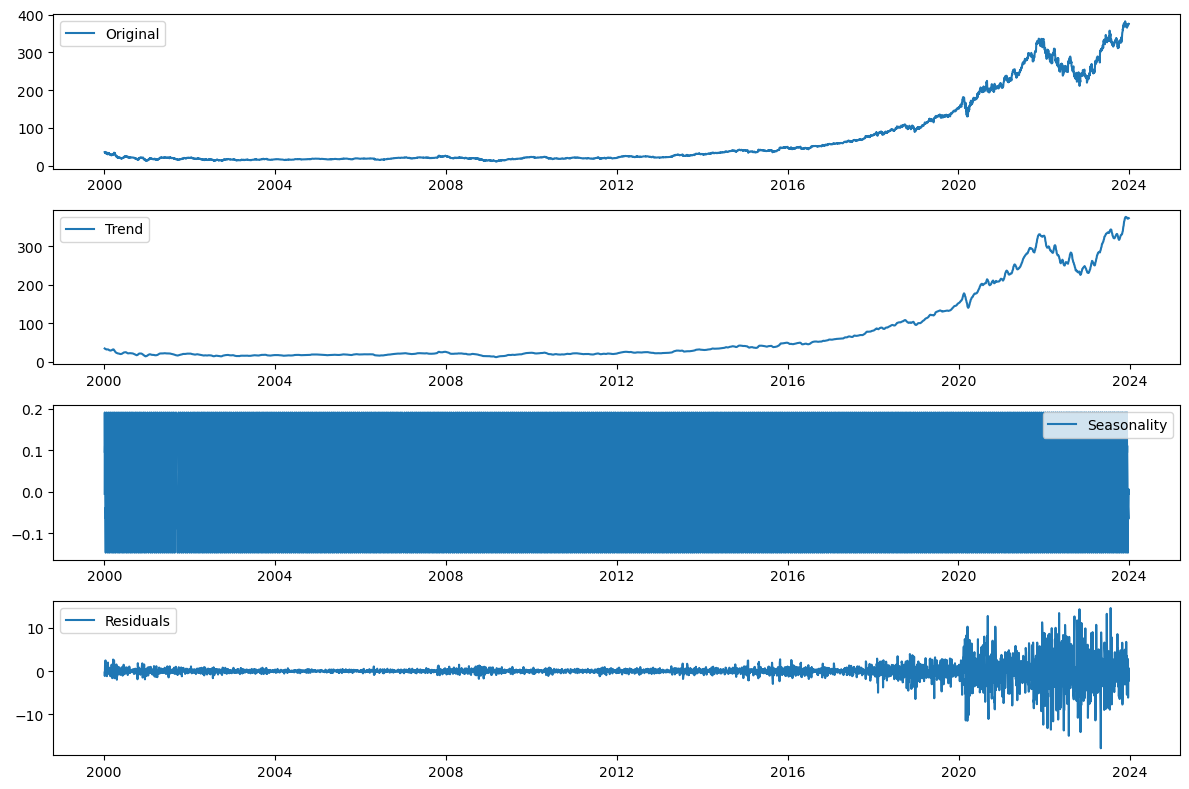

In [7]:
data.decompose_and_plot(MSFT,12)

In [8]:
data.check_stationarity(train_msft)

Results of Dickey-Fuller Test for adj_close:
Test Statistic                   -2.271114
p-value                           0.181453
#Lags Used                       21.000000
Number of Observations Used    3600.000000
Critical Value (1%)              -3.432168
Critical Value (5%)              -2.862343
Critical Value (10%)             -2.567198
dtype: float64
Results of KPSS Test for adj_close:
Test Statistic            2.781718
p-value                   0.010000
Lags Used                38.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
adj_close time series data is not stationary


<Figure size 600x300 with 0 Axes>

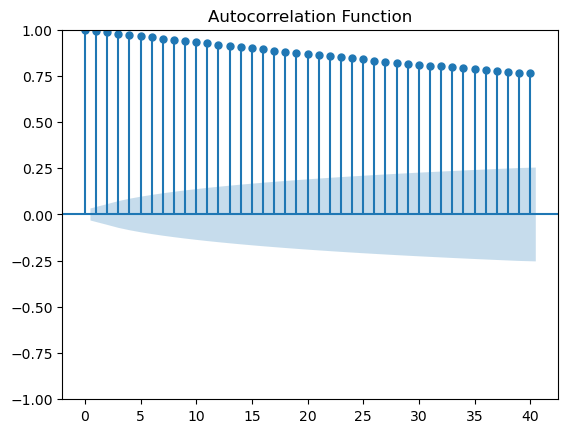

<Figure size 600x300 with 0 Axes>

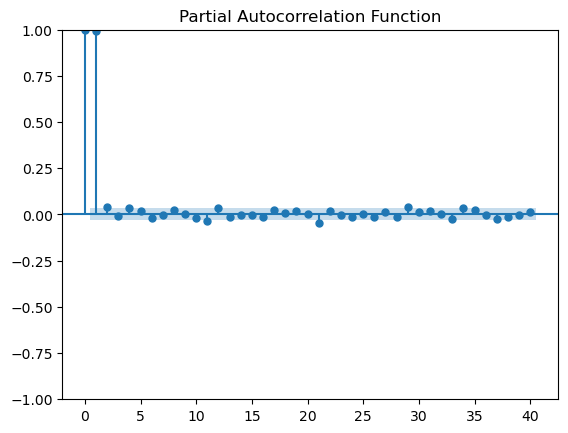

In [9]:
data.plot_time_series_analysis(train_msft,'adj_close')

## ?.ARIMA 